In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv("./Air_Traffic_Passenger_Statistics.csv")
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [16]:
print(df.isna().values.any())
print(df.isnull().values.any())

True
True


In [17]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


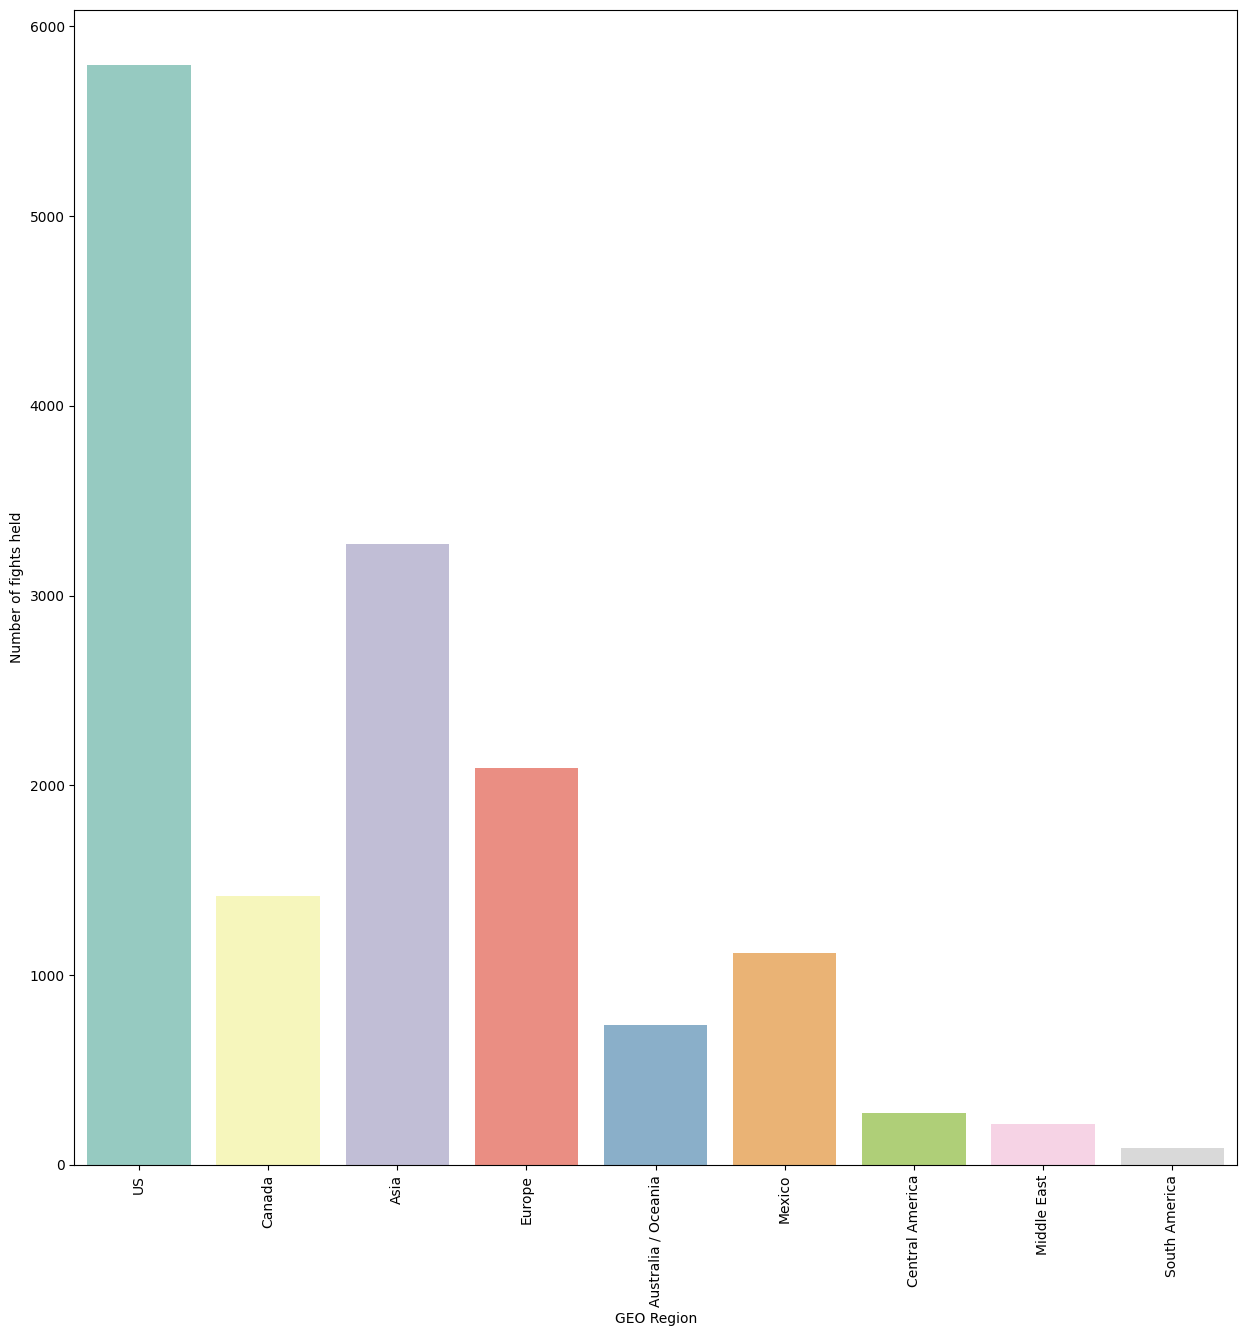

In [18]:
#Plotting based on Geo-Region

plt.figure(figsize=(15, 15))
sns.countplot(x="GEO Region", palette="Set3", data=df)
plt.xticks(rotation=90)
plt.ylabel("Number of fights held")
plt.show()

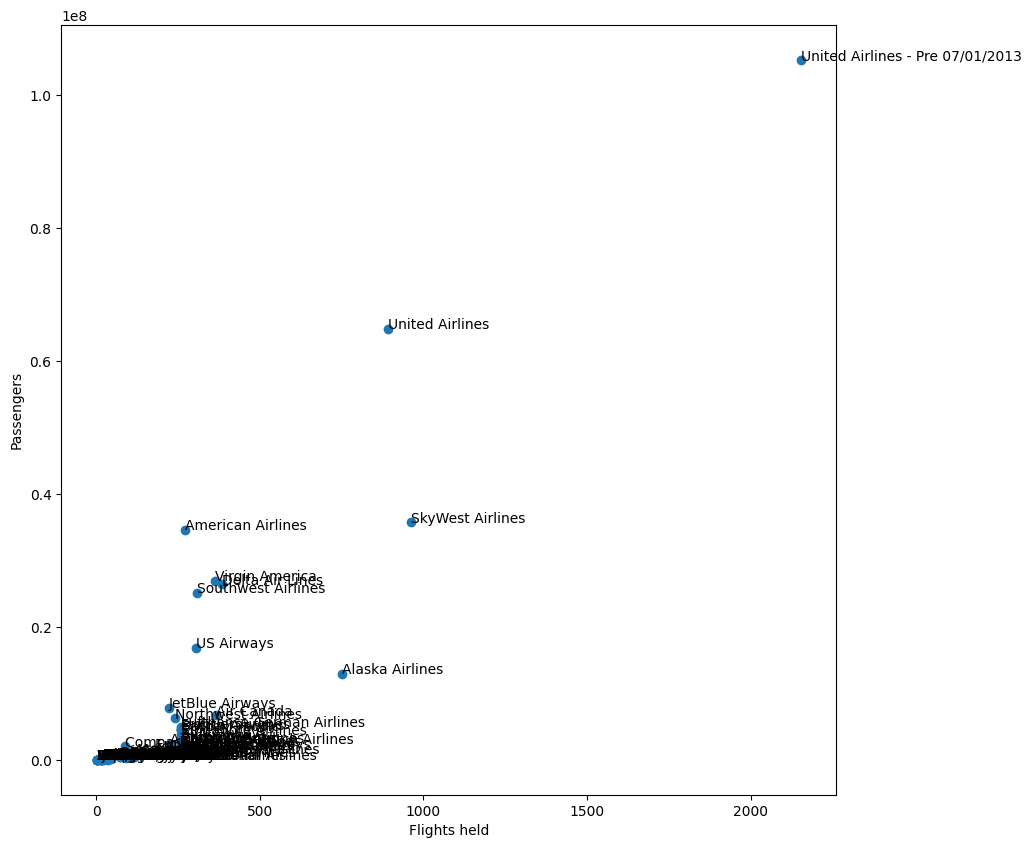

In [19]:
#Identifying Outliers

airline_count = df["Operating Airline"].value_counts()
airline_count.sort_index(inplace=True)
passenger_count = df.groupby("Operating Airline").sum()['Passenger Count']
passenger_count.sort_index(inplace=True)


x = airline_count.values
y = passenger_count.values

plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [20]:
#Removing the outliers

df_1 = airline_count + passenger_count
df_1.sort_values(ascending=False, inplace=True) #Sorting in descending order
outliers = df_1.head(2).index.values #Taking the first two rows of data

airline_count = airline_count.drop(outliers)
airline_count.sort_index(inplace=True)
passenger_count = passenger_count.drop(outliers)
passenger_count.sort_index(inplace=True)
x = airline_count.values
y = passenger_count.values

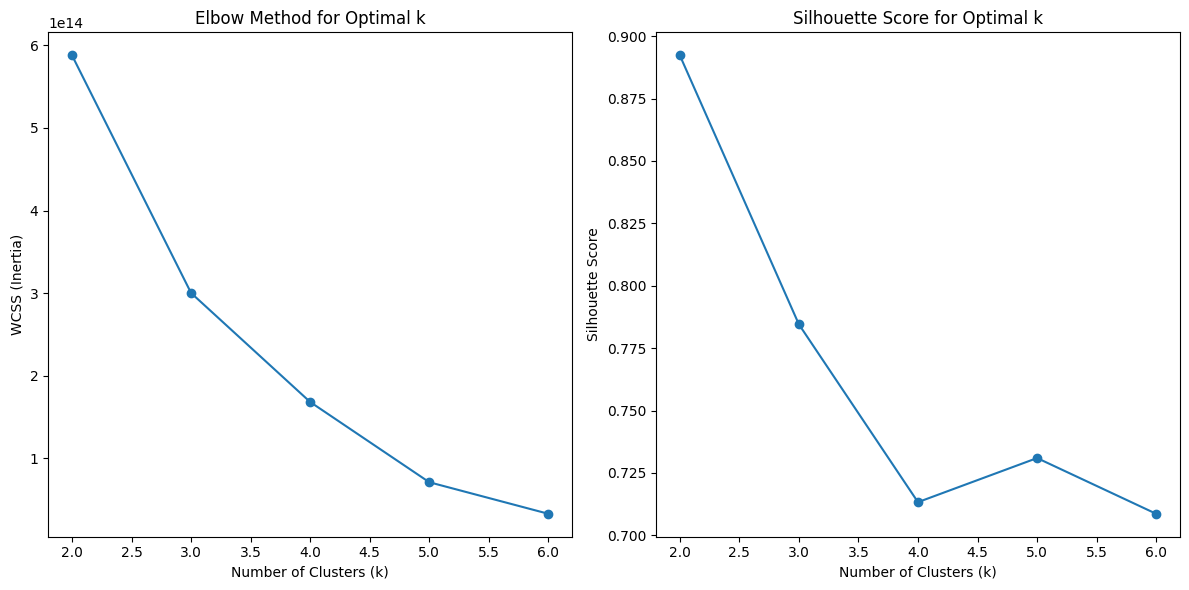

In [21]:
# Extract relevant features for clustering
from sklearn.metrics import silhouette_score


X = np.array(list(zip(x, y)))

# Initialize lists to store WCSS and Silhouette Score
wcss_values = []
silhouette_scores = []

# Test different numbers of clusters
for k in range(2, 7):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    
    # Append WCSS to the list
    wcss_values.append(kmeans.inertia_)
    
    # Compute Silhouette Score
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

# Plotting WCSS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 7), wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [22]:
# Find the optimal k based on the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Adding 2 because we started with k=2

print(f"The optimal number of clusters (k) based on silhouette score is: {optimal_k}")

The optimal number of clusters (k) based on silhouette score is: 2


Centroids of the clusters:
[[1.35724638e+02 1.49264088e+06]
 [4.32666667e+02 2.75965610e+07]]


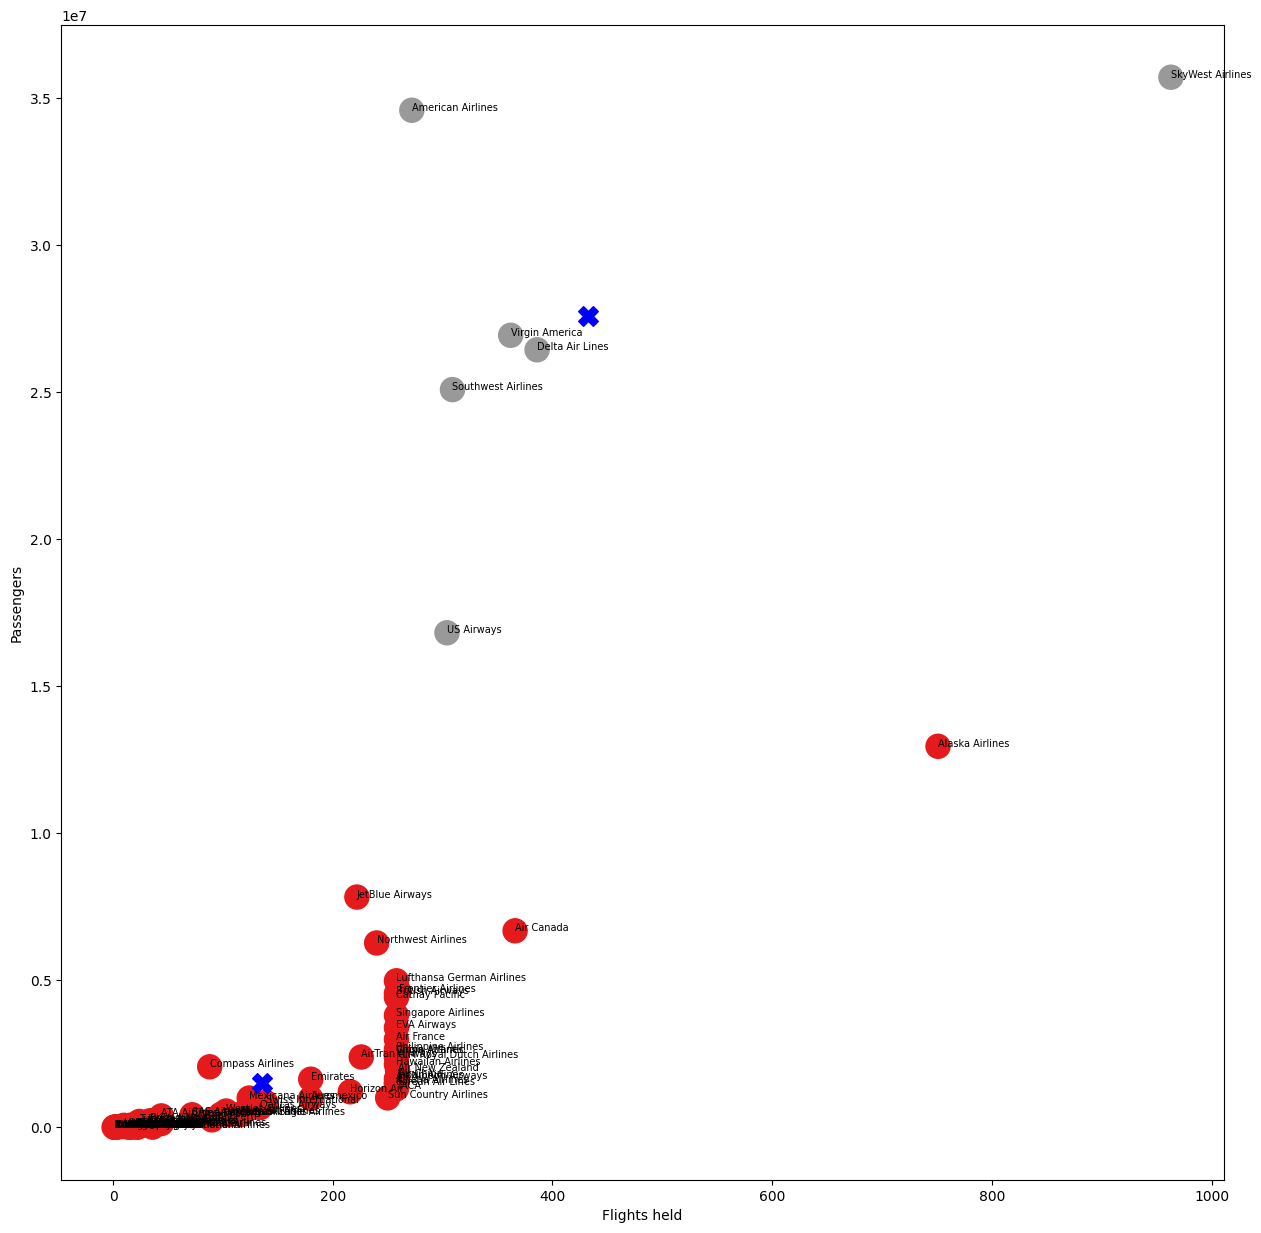

In [23]:
# K-Means clustering and visualization
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#Accessing the Centroids
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

plt.figure(figsize=(15, 15))
plt.xlabel("Flights held")
plt.ylabel("Passengers")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s= 300, cmap='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='X', s=200, label='Centroids')
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (X[i, 0], X[i, 1]), size=7)
plt.show()


The Average Silhouette Score is:  0.7086554140628045


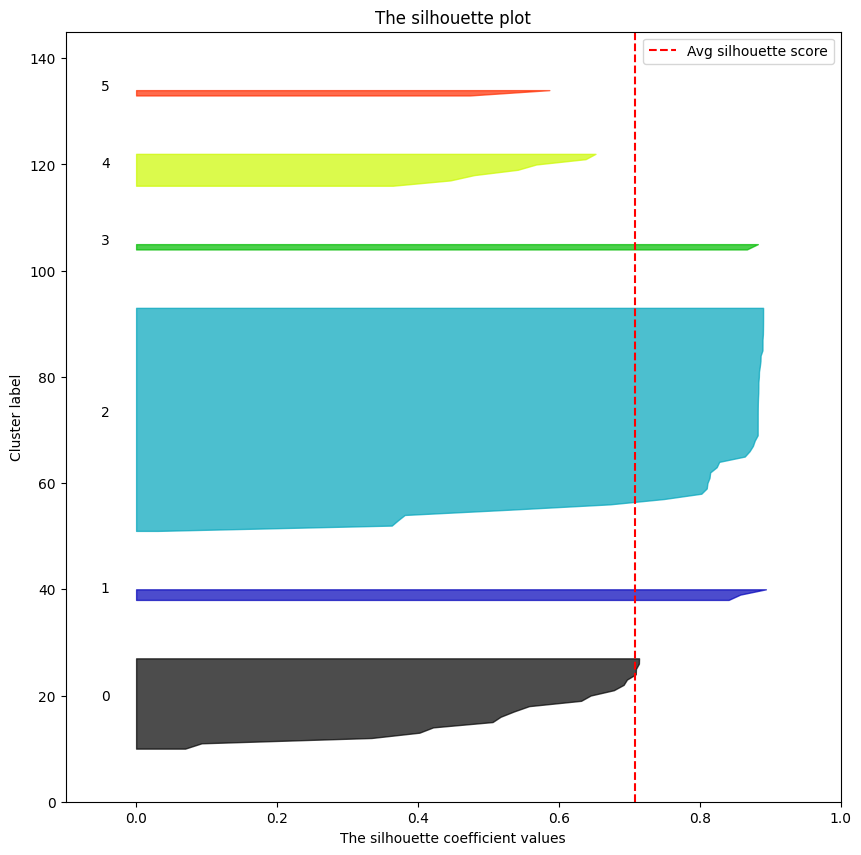

In [24]:
#Clustering Validation : Silhouette Analysis
#a[i] - average distances between current point i and i's cluster neighbors
#b[i] - min value of distances between current point i and points j that are not from the same cluster as i
#silhouette score takes values in the range [-1: 1]

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

n_clusters=6
plt.figure(figsize=(10, 10))
plt.gca().set_xlim([-0.1, 1])
plt.gca().set_ylim([0, len(X) + (n_clusters + 1)* 10])
clusterer = KMeans(n_clusters = n_clusters, random_state=10)
labels = clusterer.fit_predict(X)
print("The Average Silhouette Score is:  {}".format(silhouette_score(X, labels)))
sampple_silhoette_values = silhouette_samples(X, labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sampple_silhoette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(X, labels), color="red", linestyle="--", label="Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()


# In silhouette plot we draw a silhouette coefficient for every point grouped into clusters and sorted inside them. 
# Looking at the plot we can tell how good is our classification: if the width of all “bars” is the same 
# and every point inside a cluster has the silhouette coefficient bigger than the global average, 
# such classification can be called good, otherwise we can’t tell that it’s absolutely perfect